Transformer的位置编码
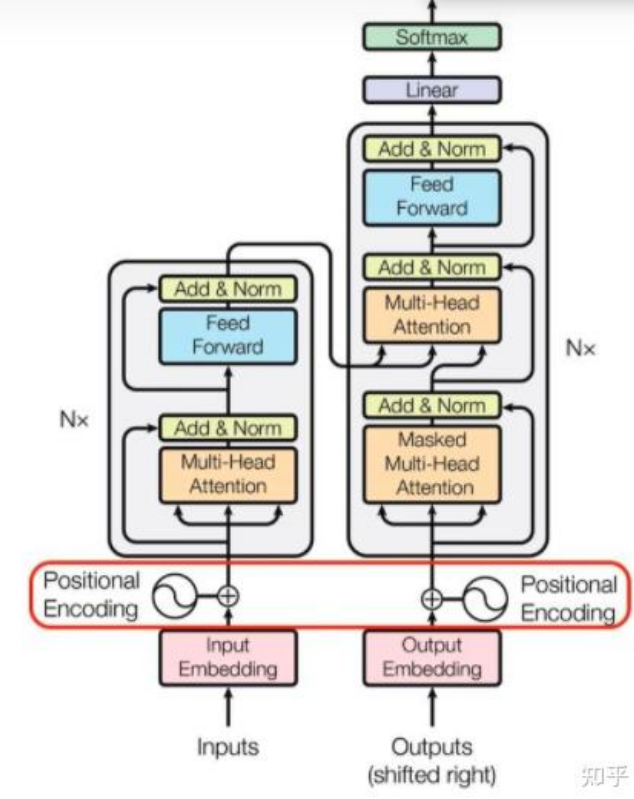


由于attention模块本身没有位置信息的缺陷,  
在文本输入经过embedding变成词向量后，加入位置编码信息,  
使得最终的输入满足  
input = input_embedding + positional_encoding  
input_embedding是通过常规embedding层，将每一个token的向量维度从vocab_size映射到d_model，由于是相加关系，自然而然地，这里的positional_encoding也是一个d_model维度的向量。（在原论文里，d_model = 512）


构造位置编码恶的演变历程
1.  用整型值标记位置   
一种自然而然的想法是，给第一个token标记1，给第二个token标记2...，以此类推。  
这种方法产生了以下几个主要问题：  
（1）模型可能遇见比训练时所用的序列更长的序列。不利于模型的泛化。   
（2）模型的位置表示是无界的。随着序列长度的增加，位置值会越来越大。  

2. 用[0,1]范围标记位置  
为了解决整型值带来的问题，可以考虑将位置值的范围限制在[0, 1]之内，其中，0表示第一个token，1表示最后一个token。比如有3个token，那么位置信息就表示成[0, 0.5, 1]；若有四个token，位置信息就表示成[0, 0.33, 0.69, 1]。  
但这样产生的问题是，当序列长度不同时，token间的相对距离是不一样的。例如在序列长度为3时，token间的相对距离为0.5；在序列长度为4时，token间的相对距离就变为0.33。  

因此，我们需要这样一种位置表示方式，满足于： 
1. 可以表示一个token在序列中的绝对位置  
 
2. 可以用来表示模型在训练过程中从来没有看过的句子长度  

3. 在序列长度不同的情况下。不同序列中token的相对位置距离也要保持一致

3. 用二进制向量标记位置  
考虑到位置信息作用在input embedding上，因此比起用单一的值，更好的方案是用一个和input embedding维度一样的向量来表示位置。这时我们就很容易想到二进制编码。如下图，假设d_model = 3，那么我们的位置向量可以表示成：  
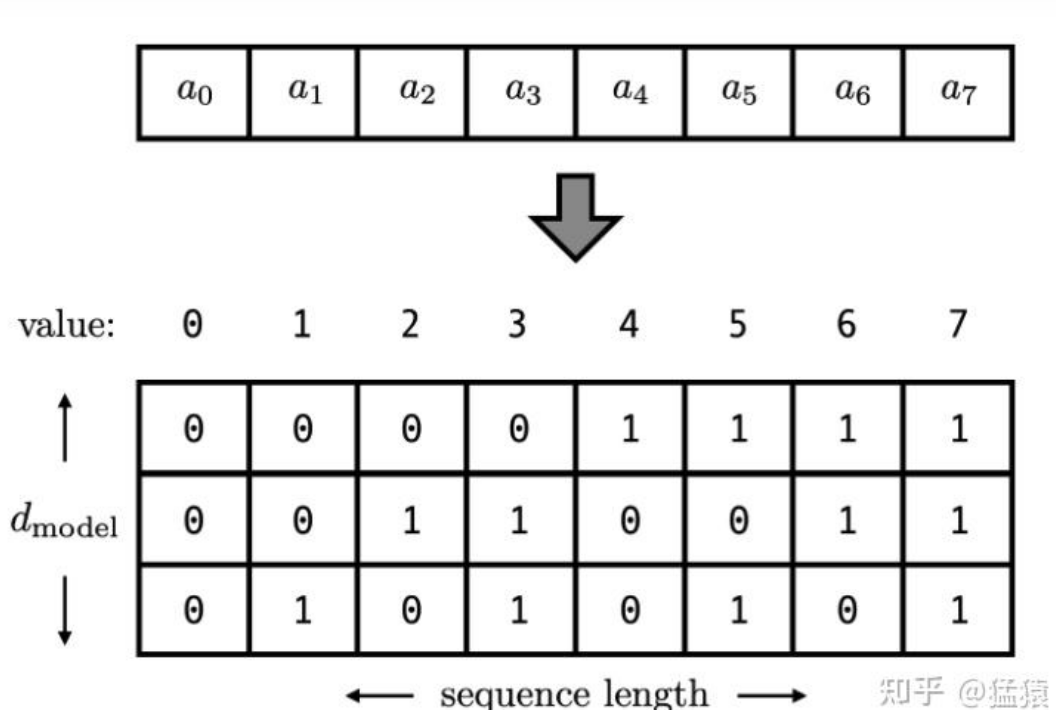  
这下所有的值都是有界的（位于0，1之间），且transformer中的d_model本来就足够大，基本可以把我们要的每一个位置都编码出来了。  
但是这种编码方式也存在问题：这样编码出来的位置向量，处在一个离散的空间中，不同位置间的变化是不连续的。假设d_model = 2，我们有4个位置需要编码，这四个位置向量可以表示成[0,0],[0,1],[1,0],[1,1]。我们把它的位置向量空间做出来：  
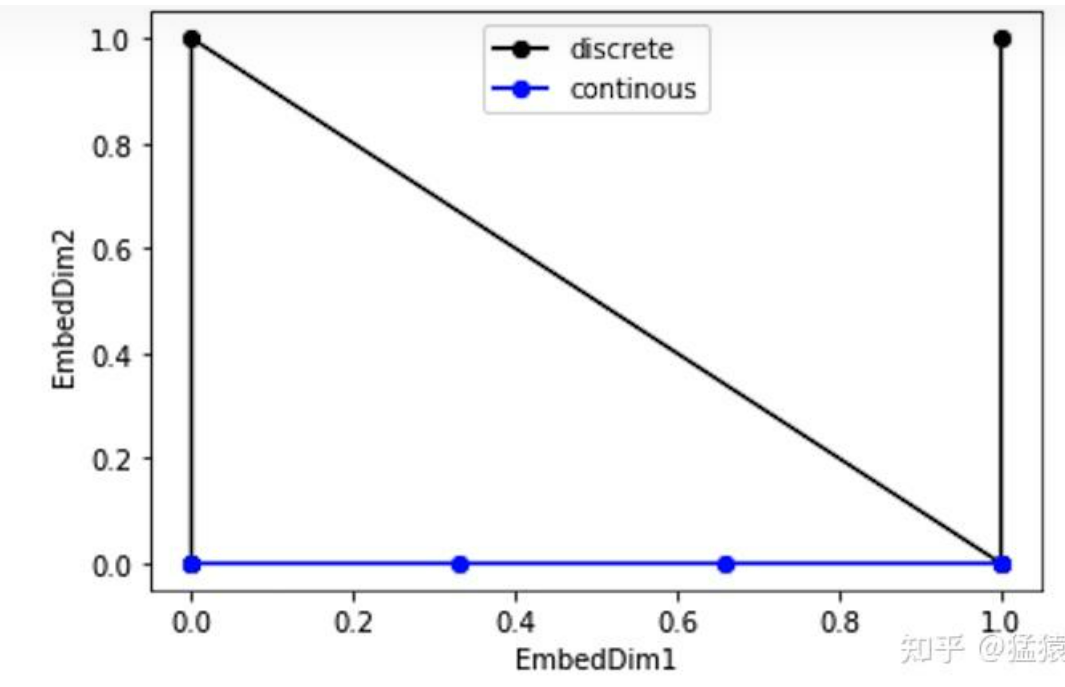  
如果我们能把离散空间（黑色的线）转换到连续空间（蓝色的线），那么我们就能解决位置距离不连续的问题。

4. 用周期函数（sin）来表示位置  
回想一下，现在我们需要一个有界又连续的函数，最简单的，正弦函数sin就可以满足这一点。我们可以考虑把位置向量当中的每一个元素都用一个sin函数来表示，则第t个token的位置向量可以表示为：  
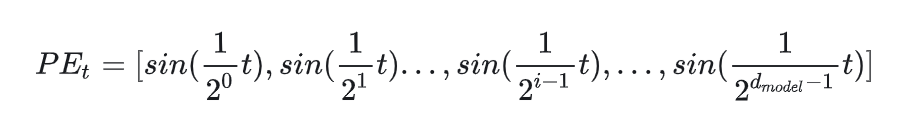  
 